<h1>Tracking the 2019 NBA Draft Lottery Picks: Most Improved Rookie</h1>
<img src="https://i.redd.it/1l2l439o6cz61.jpg" Title="RJ Barrett" height="300px" width="200px"/>

<b>Background:</b> 2019 was the first NBA season that I watched fully, and got very into the sport. Since that was my first experience watching the draft, I wanted to track the progression of the rookie class I was most familiar with. This project will only deal with very simple stats, since I am not a statistician or particularly good at math.<br><br>

<b>Goal:</b> Determine the most improved player from their rookie to sophmore seasons based on total points, assists, 2-point%, 3-point%, and steals.<br>
<br>
<b>Notes:</b> This project will only take into account the lottery picks (first 10 players drafted) of the 2019 draft.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

<h2>Part 1: Getting data & tidying it</h2>


**This section gave me a lot of issues with trying to format the data properly. I eventually figured out that I needed to add more backslashes to remove the original backslashes from player names.**

In [2]:
stats_2019 = pd.read_csv("/Users/mars/Downloads/Local/2019(1).csv")#---read 2019 stats
stats_2019.columns

#---change player names to match 2020 table and remove backslashes from PTS column
stats_2019.rename(columns={"PTS\\":"PTS"}, inplace=True)
stats_2019['PTS'] = stats_2019['PTS'].replace(['14.3\\','9.2\\','12.3\\','13.5\\', '7.4\\', '12.3\\','17.8\\', '10.5\\','13.2\\','22.5}'],['14.3','9.2','12.3','13.5','7.4','12.3','17.8','10.5','13.2','22.5'])
stats_2019['Player'] = stats_2019['Player'].replace(['RJ Barrett\\\\barrerj01','Jarrett Culver\\\culveja01','Darius Garland\\\garlada01','Rui Hachimura\\\hachiru01', 'Jaxson Hayes\\\hayesja02', 'De\'Andre Hunter\\\huntede01','Ja Morant\\\moranja01', 'Cam Reddish\\\\reddica01','Coby White\\\whiteco01','Zion Williamson\\\willizi01'],['RJ Barrett','Jarrett Culver','Darius Garland','Rui Hachimura','Jaxson Hayes','De\'Andre Hunter','Ja Morant','Cam Reddish','Coby White','Zion Williamson'])

stats_2019.head(10)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,RJ Barrett,SG,19,NYK,56,55,30.4,5.2,13.0,0.402,...,0.614,0.9,4.1,5.0,2.6,1.0,0.3,2.2,2.2,14.3
1,Jarrett Culver,SG,20,MIN,63,35,23.9,3.7,9.0,0.404,...,0.462,1.1,2.3,3.4,1.7,0.9,0.6,1.3,2.0,9.2
2,Darius Garland,SG,20,CLE,59,59,30.9,4.7,11.8,0.401,...,0.875,0.5,1.4,1.9,3.9,0.7,0.1,2.6,1.6,12.3
3,Rui Hachimura,PF,21,WAS,48,48,30.1,5.3,11.4,0.466,...,0.829,1.6,4.5,6.1,1.8,0.8,0.2,1.1,2.2,13.5
4,Jaxson Hayes,C,19,NOP,64,14,16.9,2.7,4.0,0.672,...,0.647,1.5,2.5,4.0,0.9,0.4,0.9,0.8,2.5,7.4
5,De'Andre Hunter,SF,22,ATL,63,62,32.0,4.4,10.8,0.410,...,0.764,0.7,3.8,4.5,1.8,0.7,0.3,1.6,2.9,12.3
6,Ja Morant,PG,20,MEM,67,67,31.0,6.7,14.0,0.477,...,0.776,0.8,3.1,3.9,7.3,0.9,0.3,3.3,1.6,17.8
7,Cam Reddish,SF,20,ATL,58,34,26.7,3.7,9.6,0.384,...,0.802,0.6,3.1,3.7,1.5,1.1,0.5,1.7,2.3,10.5
8,Coby White,PG,19,CHI,65,1,25.8,4.8,12.2,0.394,...,0.791,0.4,3.1,3.5,2.7,0.8,0.1,1.7,1.8,13.2
9,Zion Williamson,PF,19,NOP,24,24,27.8,8.8,15.0,0.583,...,0.640,2.7,3.6,6.3,2.1,0.7,0.4,2.5,1.8,22.5


In [3]:
stats_2020 = pd.read_csv("/Users/mars/Downloads/Local/2020-2021.csv") #---read 2020 stats

#---replace player names to readable format
stats_2020['Player'] = stats_2020['Player'].replace(['RJ Barrett\\barrerj01','Jarrett Culver\culveja01','Darius Garland\garlada01','Rui Hachimura\hachiru01', 'Jaxson Hayes\hayesja02', 'De\'Andre Hunter\huntede01','Ja Morant\moranja01', 'Cam Reddish\\reddica01','Coby White\whiteco01','Zion Williamson\willizi01'],['RJ Barrett','Jarrett Culver','Darius Garland','Rui Hachimura','Jaxson Hayes','De\'Andre Hunter','Ja Morant','Cam Reddish','Coby White','Zion Williamson'])

stats_2020.head(10)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,31,RJ Barrett,SG,20,NYK,68,68,34.9,6.6,14.8,...,0.745,1.0,4.8,5.8,3.0,0.8,0.3,2.0,2.6,17.7
1,113,Jarrett Culver,SG,21,MIN,34,7,14.7,2.0,4.9,...,0.604,1.0,2.1,3.1,0.7,0.5,0.3,0.8,1.7,5.3
2,169,Darius Garland,PG,21,CLE,53,50,33.5,6.8,15.1,...,0.848,0.4,2.0,2.4,6.2,1.2,0.1,3.1,2.1,17.7
3,192,Rui Hachimura,PF,22,WAS,54,54,31.4,5.4,11.3,...,0.775,0.9,4.6,5.5,1.4,0.8,0.1,1.2,2.1,13.9
4,210,Jaxson Hayes,C,20,NOP,57,3,15.8,2.8,4.4,...,0.775,1.4,2.7,4.1,0.6,0.4,0.6,0.7,1.7,7.1
5,234,De'Andre Hunter,SF,23,ATL,21,18,30.4,5.5,11.0,...,0.867,0.8,4.2,5.0,2.0,0.9,0.5,1.3,2.6,15.5
6,349,Ja Morant,PG,21,MEM,60,60,32.5,6.9,15.2,...,0.728,0.9,3.0,3.9,7.3,0.9,0.2,3.2,1.4,19.2
7,419,Cam Reddish,SF,21,ATL,26,21,28.8,3.7,10.1,...,0.817,0.8,3.2,4.0,1.3,1.3,0.3,1.3,2.6,11.2
8,514,Coby White,PG,20,CHI,65,50,30.9,5.5,13.1,...,0.906,0.4,3.7,4.1,4.7,0.5,0.2,2.3,2.6,15.2
9,524,Zion Williamson,PF,20,NOP,61,61,33.2,10.4,17.0,...,0.698,2.7,4.5,7.2,3.7,0.9,0.6,2.7,2.2,27.0


<b>Now that we have the players set, we can drop the columns we don't need, and keep the ones we will be using for our analysis.</b>

In [4]:
#---remove columns that will not be considered in analysis
rookies = stats_2019.drop(['G','Pos', 'Age', 'GS', 'MP', 'FT%', 'BLK', 'PF', 'TRB', 'FTA', 'FGA', '3PA', '2PA','FT','eFG%', 'TOV', 'FG', 'FG%',], axis=1)
rookies.head()

,Player,Tm,3P,3P%,2P,2P%,ORB,DRB,AST,STL,PTS
0,RJ Barrett,NYK,1.1,0.320,4.1,0.432,0.9,4.1,2.6,1.0,14.3
1,Jarrett Culver,MIN,1.0,0.299,2.6,0.471,1.1,2.3,1.7,0.9,9.2
2,Darius Garland,CLE,1.8,0.355,3.0,0.434,0.5,1.4,3.9,0.7,12.3
3,Rui Hachimura,WAS,0.5,0.287,4.8,0.500,1.6,4.5,1.8,0.8,13.5
4,Jaxson Hayes,NOP,0.0,0.250,2.7,0.678,1.5,2.5,0.9,0.4,7.4


In [5]:
#---remove columns that will not be considered for analysis
sophomores = stats_2020.drop(['G','Rk','Pos', 'Age', 'GS', 'MP', 'FT%', 'BLK', 'PF', 'TRB', 'FTA', 'FGA', '3PA', '2PA','FT','eFG%', 'TOV', 'FG', 'FG%',], axis=1)
sophomores.head(10)

,Player,Tm,3P,3P%,2P,2P%,ORB,DRB,AST,STL,PTS
0,RJ Barrett,NYK,1.7,0.403,4.9,0.460,1.0,4.8,3.0,0.8,17.7
1,Jarrett Culver,MIN,0.4,0.245,1.6,0.487,1.0,2.1,0.7,0.5,5.3
2,Darius Garland,CLE,2.0,0.394,4.8,0.480,0.4,2.0,6.2,1.2,17.7
3,Rui Hachimura,WAS,0.8,0.323,4.6,0.519,0.9,4.6,1.4,0.8,13.9
4,Jaxson Hayes,NOP,0.1,0.545,2.7,0.647,1.4,2.7,0.6,0.4,7.1
5,De'Andre Hunter,ATL,1.5,0.348,4.0,0.596,0.8,4.2,2.0,0.9,15.5
6,Ja Morant,MEM,1.1,0.304,5.7,0.499,0.9,3.0,7.3,0.9,19.2
7,Cam Reddish,ATL,1.3,0.262,2.4,0.460,0.8,3.2,1.3,1.3,11.2
8,Coby White,CHI,2.3,0.359,3.1,0.476,0.4,3.7,4.7,0.5,15.2
9,Zion Williamson,NOP,0.2,0.294,10.2,0.622,2.7,4.5,3.7,0.9,27.0


In [6]:
rookies.dtypes 
rookies["PTS"] = pd.to_numeric(rookies["PTS"]) #---change PTS from object to numeric
rookies.head(10)

,Player,Tm,3P,3P%,2P,2P%,ORB,DRB,AST,STL,PTS
0,RJ Barrett,NYK,1.1,0.320,4.1,0.432,0.9,4.1,2.6,1.0,14.3
1,Jarrett Culver,MIN,1.0,0.299,2.6,0.471,1.1,2.3,1.7,0.9,9.2
2,Darius Garland,CLE,1.8,0.355,3.0,0.434,0.5,1.4,3.9,0.7,12.3
3,Rui Hachimura,WAS,0.5,0.287,4.8,0.500,1.6,4.5,1.8,0.8,13.5
4,Jaxson Hayes,NOP,0.0,0.250,2.7,0.678,1.5,2.5,0.9,0.4,7.4
5,De'Andre Hunter,ATL,1.7,0.355,2.7,0.454,0.7,3.8,1.8,0.7,12.3
6,Ja Morant,MEM,0.9,0.335,5.8,0.511,0.8,3.1,7.3,0.9,17.8
7,Cam Reddish,ATL,1.4,0.332,2.2,0.428,0.6,3.1,1.5,1.1,10.5
8,Coby White,CHI,2.0,0.354,2.8,0.430,0.4,3.1,2.7,0.8,13.2
9,Zion Williamson,NOP,0.3,0.429,8.5,0.590,2.7,3.6,2.1,0.7,22.5


<h2>Part 2: Analysis</h2><br>
<b>Using the stats that we have, the goal is to determine which player had the overall most improvement from the 2019 to 2020 season.</b>
<br>
<i>The same "formula" will be used for each stat.</i>

In [29]:
rookies['Player'] = sophomores['Player'] #---calculate the difference between total points
sophomores['ptdiff'] = np.where(sophomores['PTS'] == rookies['PTS'], 0, sophomores['PTS'] - rookies['PTS'])
sophomores.head(10)

,Player,Tm,3P,3P%,2P,2P%,ORB,DRB,AST,STL,PTS,Diff,ptdiff
0,RJ Barrett,NYK,1.7,0.403,4.9,0.460,1.0,4.8,3.0,0.8,17.7,0.028,3.4
1,Jarrett Culver,MIN,0.4,0.245,1.6,0.487,1.0,2.1,0.7,0.5,5.3,0.016,-3.9
2,Darius Garland,CLE,2.0,0.394,4.8,0.480,0.4,2.0,6.2,1.2,17.7,0.046,5.4
3,Rui Hachimura,WAS,0.8,0.323,4.6,0.519,0.9,4.6,1.4,0.8,13.9,0.019,0.4
4,Jaxson Hayes,NOP,0.1,0.545,2.7,0.647,1.4,2.7,0.6,0.4,7.1,-0.031,-0.3
5,De'Andre Hunter,ATL,1.5,0.348,4.0,0.596,0.8,4.2,2.0,0.9,15.5,0.142,3.2
6,Ja Morant,MEM,1.1,0.304,5.7,0.499,0.9,3.0,7.3,0.9,19.2,-0.012,1.4
7,Cam Reddish,ATL,1.3,0.262,2.4,0.460,0.8,3.2,1.3,1.3,11.2,0.032,0.7
8,Coby White,CHI,2.3,0.359,3.1,0.476,0.4,3.7,4.7,0.5,15.2,0.046,2.0
9,Zion Williamson,NOP,0.2,0.294,10.2,0.622,2.7,4.5,3.7,0.9,27.0,0.032,4.5


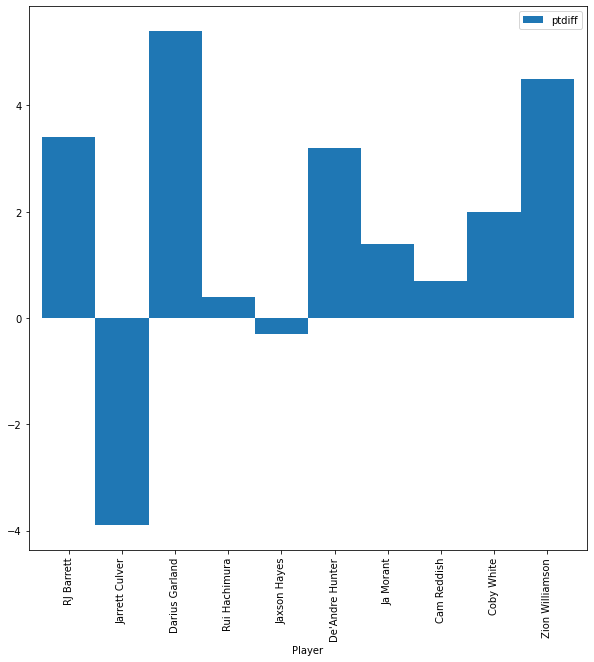

In [30]:
pts = sophomores.plot.bar(x='Player', y= 'ptdiff', figsize=(10, 10), width=1) 
#----plot difference for visualization.

In [31]:
rookies['Player'] = sophomores['Player'] #---calculate the difference between assists
sophomores['astdiff'] = np.where(sophomores['AST'] == rookies['AST'], 0, sophomores['AST'] - rookies['AST'])
sophomores.head(10)

,Player,Tm,3P,3P%,2P,2P%,ORB,DRB,AST,STL,PTS,Diff,ptdiff,astdiff
0,RJ Barrett,NYK,1.7,0.403,4.9,0.460,1.0,4.8,3.0,0.8,17.7,0.028,3.4,0.4
1,Jarrett Culver,MIN,0.4,0.245,1.6,0.487,1.0,2.1,0.7,0.5,5.3,0.016,-3.9,-1.0
2,Darius Garland,CLE,2.0,0.394,4.8,0.480,0.4,2.0,6.2,1.2,17.7,0.046,5.4,2.3
3,Rui Hachimura,WAS,0.8,0.323,4.6,0.519,0.9,4.6,1.4,0.8,13.9,0.019,0.4,-0.4
4,Jaxson Hayes,NOP,0.1,0.545,2.7,0.647,1.4,2.7,0.6,0.4,7.1,-0.031,-0.3,-0.3
5,De'Andre Hunter,ATL,1.5,0.348,4.0,0.596,0.8,4.2,2.0,0.9,15.5,0.142,3.2,0.2
6,Ja Morant,MEM,1.1,0.304,5.7,0.499,0.9,3.0,7.3,0.9,19.2,-0.012,1.4,0.0
7,Cam Reddish,ATL,1.3,0.262,2.4,0.460,0.8,3.2,1.3,1.3,11.2,0.032,0.7,-0.2
8,Coby White,CHI,2.3,0.359,3.1,0.476,0.4,3.7,4.7,0.5,15.2,0.046,2.0,2.0
9,Zion Williamson,NOP,0.2,0.294,10.2,0.622,2.7,4.5,3.7,0.9,27.0,0.032,4.5,1.6


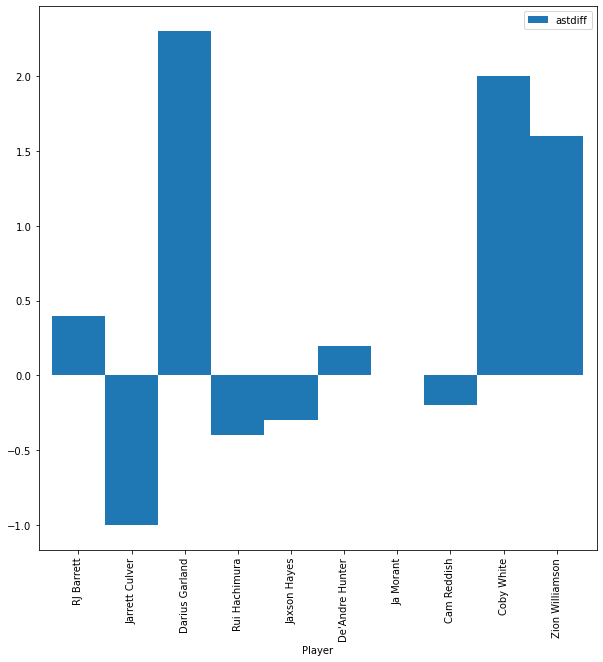

In [54]:
ast = sophomores.plot.bar(x='Player', y= 'astdiff', figsize=(10, 10), width=1) 
#----plot difference for visualization.

In [35]:
rookies['Player'] = sophomores['Player'] #---calculate the difference between 2-point percentage
sophomores['twoptdiff'] = np.where(sophomores['2P%'] == rookies['2P%'], 0, sophomores['2P%'] - rookies['2P%'])
sophomores.head(10)

,Player,Tm,3P,3P%,2P,2P%,ORB,DRB,AST,STL,PTS,Diff,ptdiff,astdiff,twoptdiff
0,RJ Barrett,NYK,1.7,0.403,4.9,0.460,1.0,4.8,3.0,0.8,17.7,0.028,3.4,0.4,0.028
1,Jarrett Culver,MIN,0.4,0.245,1.6,0.487,1.0,2.1,0.7,0.5,5.3,0.016,-3.9,-1.0,0.016
2,Darius Garland,CLE,2.0,0.394,4.8,0.480,0.4,2.0,6.2,1.2,17.7,0.046,5.4,2.3,0.046
3,Rui Hachimura,WAS,0.8,0.323,4.6,0.519,0.9,4.6,1.4,0.8,13.9,0.019,0.4,-0.4,0.019
4,Jaxson Hayes,NOP,0.1,0.545,2.7,0.647,1.4,2.7,0.6,0.4,7.1,-0.031,-0.3,-0.3,-0.031
5,De'Andre Hunter,ATL,1.5,0.348,4.0,0.596,0.8,4.2,2.0,0.9,15.5,0.142,3.2,0.2,0.142
6,Ja Morant,MEM,1.1,0.304,5.7,0.499,0.9,3.0,7.3,0.9,19.2,-0.012,1.4,0.0,-0.012
7,Cam Reddish,ATL,1.3,0.262,2.4,0.460,0.8,3.2,1.3,1.3,11.2,0.032,0.7,-0.2,0.032
8,Coby White,CHI,2.3,0.359,3.1,0.476,0.4,3.7,4.7,0.5,15.2,0.046,2.0,2.0,0.046
9,Zion Williamson,NOP,0.2,0.294,10.2,0.622,2.7,4.5,3.7,0.9,27.0,0.032,4.5,1.6,0.032


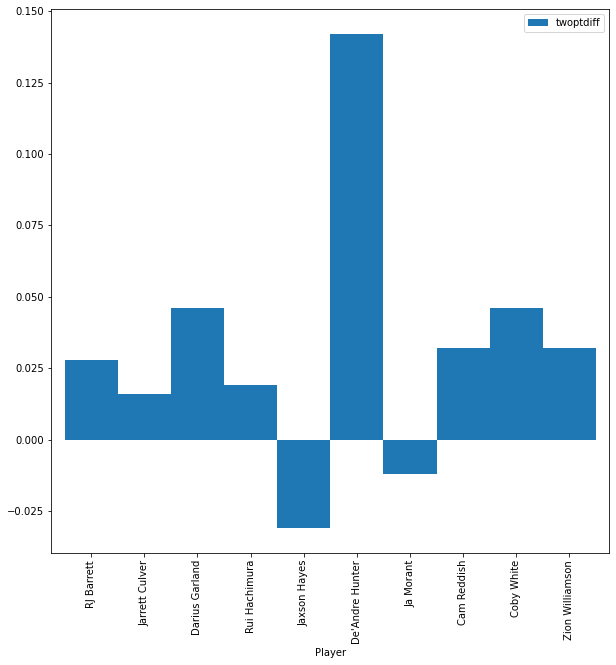

In [36]:
twopt = sophomores.plot.bar(x='Player', y= 'twoptdiff', figsize=(10, 10), width=1) 
#----plot difference for visualization.

In [37]:
rookies['Player'] = sophomores['Player'] #---calculate the difference between 3-point percentage
sophomores['threeptdiff'] = np.where(sophomores['3P%'] == rookies['3P%'], 0, sophomores['3P%'] - rookies['3P%'])
sophomores.head(10)

,Player,Tm,3P,3P%,2P,2P%,ORB,DRB,AST,STL,PTS,Diff,ptdiff,astdiff,twoptdiff,threeptdiff
0,RJ Barrett,NYK,1.7,0.403,4.9,0.460,1.0,4.8,3.0,0.8,17.7,0.028,3.4,0.4,0.028,0.083
1,Jarrett Culver,MIN,0.4,0.245,1.6,0.487,1.0,2.1,0.7,0.5,5.3,0.016,-3.9,-1.0,0.016,-0.054
2,Darius Garland,CLE,2.0,0.394,4.8,0.480,0.4,2.0,6.2,1.2,17.7,0.046,5.4,2.3,0.046,0.039
3,Rui Hachimura,WAS,0.8,0.323,4.6,0.519,0.9,4.6,1.4,0.8,13.9,0.019,0.4,-0.4,0.019,0.036
4,Jaxson Hayes,NOP,0.1,0.545,2.7,0.647,1.4,2.7,0.6,0.4,7.1,-0.031,-0.3,-0.3,-0.031,0.295
5,De'Andre Hunter,ATL,1.5,0.348,4.0,0.596,0.8,4.2,2.0,0.9,15.5,0.142,3.2,0.2,0.142,-0.007
6,Ja Morant,MEM,1.1,0.304,5.7,0.499,0.9,3.0,7.3,0.9,19.2,-0.012,1.4,0.0,-0.012,-0.031
7,Cam Reddish,ATL,1.3,0.262,2.4,0.460,0.8,3.2,1.3,1.3,11.2,0.032,0.7,-0.2,0.032,-0.070
8,Coby White,CHI,2.3,0.359,3.1,0.476,0.4,3.7,4.7,0.5,15.2,0.046,2.0,2.0,0.046,0.005
9,Zion Williamson,NOP,0.2,0.294,10.2,0.622,2.7,4.5,3.7,0.9,27.0,0.032,4.5,1.6,0.032,-0.135


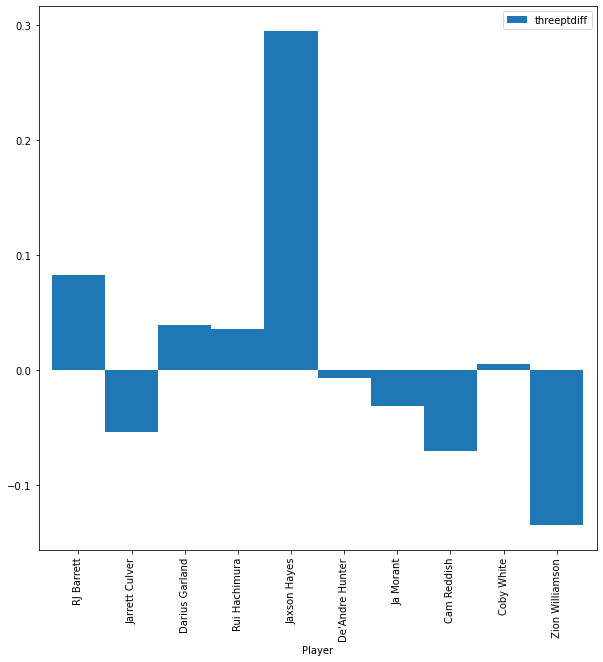

In [38]:
threept = sophomores.plot.bar(x='Player', y= 'threeptdiff', figsize=(10, 10), width=1) 
#----plot difference for visualization.

In [48]:
rookies['Player'] = sophomores['Player'] #---calculate the difference between steals
sophomores['stldiff'] = np.where(sophomores['STL'] == rookies['STL'], 0, sophomores['STL'] - rookies['STL'])
sophomores.head(10)


,Player,Tm,3P,3P%,2P,2P%,ORB,DRB,AST,STL,PTS,Diff,ptdiff,astdiff,twoptdiff,threeptdiff,stldiffdiff,stldiff
0,RJ Barrett,NYK,1.7,0.403,4.9,0.460,1.0,4.8,3.0,0.8,17.7,0.028,3.4,0.4,0.028,0.083,-0.2,-0.2
1,Jarrett Culver,MIN,0.4,0.245,1.6,0.487,1.0,2.1,0.7,0.5,5.3,0.016,-3.9,-1.0,0.016,-0.054,-0.4,-0.4
2,Darius Garland,CLE,2.0,0.394,4.8,0.480,0.4,2.0,6.2,1.2,17.7,0.046,5.4,2.3,0.046,0.039,0.5,0.5
3,Rui Hachimura,WAS,0.8,0.323,4.6,0.519,0.9,4.6,1.4,0.8,13.9,0.019,0.4,-0.4,0.019,0.036,0.0,0.0
4,Jaxson Hayes,NOP,0.1,0.545,2.7,0.647,1.4,2.7,0.6,0.4,7.1,-0.031,-0.3,-0.3,-0.031,0.295,0.0,0.0
5,De'Andre Hunter,ATL,1.5,0.348,4.0,0.596,0.8,4.2,2.0,0.9,15.5,0.142,3.2,0.2,0.142,-0.007,0.2,0.2
6,Ja Morant,MEM,1.1,0.304,5.7,0.499,0.9,3.0,7.3,0.9,19.2,-0.012,1.4,0.0,-0.012,-0.031,0.0,0.0
7,Cam Reddish,ATL,1.3,0.262,2.4,0.460,0.8,3.2,1.3,1.3,11.2,0.032,0.7,-0.2,0.032,-0.070,0.2,0.2
8,Coby White,CHI,2.3,0.359,3.1,0.476,0.4,3.7,4.7,0.5,15.2,0.046,2.0,2.0,0.046,0.005,-0.3,-0.3
9,Zion Williamson,NOP,0.2,0.294,10.2,0.622,2.7,4.5,3.7,0.9,27.0,0.032,4.5,1.6,0.032,-0.135,0.2,0.2


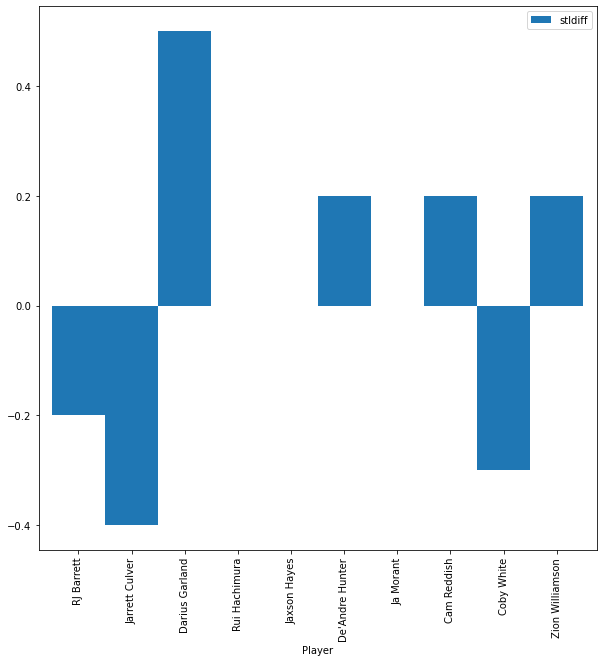

In [45]:
stl = sophomores.plot.bar(x='Player', y= 'stldiff', figsize=(10, 10), width=1) 
#----plot difference for visualization.


<h2>Part 3: Conclusions</h2>

The goal of this project was to determine the most improved player based only on average points per game (PTS), assists (AST), 3-point percentage (3P%), 2-point percentage (2P%), and steals (STL).
<br><br>
It is clear to see who improved most in each category by viewing the bar plots above. 
<img src="https://media.wkyc.com/assets/WKYC/images/b6a097d8-5ae5-4c54-9504-78b661e56fa4/b6a097d8-5ae5-4c54-9504-78b661e56fa4_750x422.jpg" Title="Darius Garland" Height="200px" Width="300px"/>
<br>
<b>Since Darius Garland had the most improvement in 3/5 categories, he is the winner!</b>

There are many other stats and factors that contribute to the actual improvement of players. For example, minutes per game and games played can impact these statistics drastically, but were not considered in this example for the sake of simplicity.

<h3>Data Sources:</h3>

https://www.basketball-reference.com/leagues/NBA_2020_per_game.html
<br><br>
https://www.basketball-reference.com/leagues/NBA_2021_per_game.html